| Field | Value |
|-|-|
| simulation file | sjostrom_vary.py |
| result files prefix | sjostrom |
| # result files | 3\*2\*2\*5\*2\*5 = 600 |
| simulation start | 2015-08-12 10:57:01 |
| simulation end | 2015-08-12 11:14:09 |
| duration | 0:17:08 |
| repository | https:/ |
| revision hash | [a3377e528efedbd7d14906abedc195b4b05880f2](https://tree/a3377e528efedbd7d14906abedc195b4b05880f2) |

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
%pylab inline
import cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [3]:
def get_vary(vary, h1, l_f, freq, delta, i):
    return cPickle.load(open('sjostrom_vary_vary_{0}_h1_{1}_l_f_{2}_freq_{3}_delta_{4}_i_{5}.p'.format(vary, h1, l_f, freq, delta, i),'rb'))


vary_s = [str(a) for a in ['alpha', 'beta', 'r_max']]
h1_s = [str(a) for a in [False, True]]
l_f_s = [str(a) for a in [1.0, 10.0]]
freq_s = [str(a) for a in array([  1.,  10.,  20.,  40.,  50.])]
delta_s = [str(a) for a in array([-10.,  10.])]
i_s = [str(a) for a in [0, 1, 2, 3, 4]]


params_vary = list(product(vary_s, h1_s, l_f_s, freq_s, delta_s, i_s))

data_vary = {tup:get_vary(*tup) for tup in params_vary}

In [6]:
def get_overfit(freq, delta):
    return cPickle.load(open('sjostrom_overfit_freq_{0}_delta_{1}.p'.format(freq, delta),'rb'))

thresh_s = map(str, [-55.0,-50.0])
params_overfit = list(product( freq_s, delta_s))

data_overfit = {tup:get_overfit(*tup) for tup in params_overfit}

In [7]:
def get_fit(h1, freq, delta):
    return cPickle.load(open('sjostrom_fit_h1_{0}_freq_{1}_delta_{2}.p'.format(h1, freq, delta),'rb'))

params_fit = list(product( h1_s, freq_s, delta_s))

data_fit = {tup:get_fit(*tup) for tup in params_fit}

## Experimental data

(-1, 51)

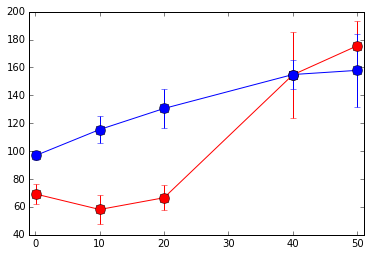

In [8]:
ltds = loadtxt('../experimental_data/sjo_ltd_freq_extracted.csv')
ltps = loadtxt('../experimental_data/sjo_ltp_freq_extracted.csv')
sjos_freqs = array([0.1, 10.0, 20.0, 40.0, 50.0])

sjos_ltds = zeros((sjos_freqs.shape[0],2))
for idx in range(sjos_ltds.shape[0]):
    sjos_ltds[idx,0] = ltds[idx*2]
    sjos_ltds[idx,1] = ltds[idx*2+1]-ltds[idx*2]

errorbar(sjos_freqs,sjos_ltds[:,0],sjos_ltds[:,1],c='r',marker='o',markersize=10)

sjos_ltps = zeros((sjos_freqs.shape[0],2))
for idx in range(sjos_ltps.shape[0]):
    sjos_ltps[idx,0] = ltps[idx*2]
    sjos_ltps[idx,1] = ltps[idx*2+1]-ltps[idx*2]
errorbar(sjos_freqs,sjos_ltps[:,0],sjos_ltps[:,1],c='b',marker='o',markersize=10)
xlim([-1,51])

## overfit

we demonstrate that we can make the model closely fit the experiment. however, this is not a generic result as is demonstrated in the section below where we use more standard parameters for $\phi$

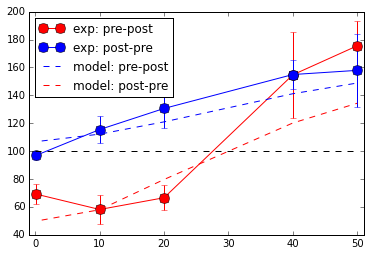

In [9]:
errorbar(sjos_freqs,sjos_ltds[:,0],sjos_ltds[:,1],c='r',marker='o',markersize=10)

sjos_ltps = zeros((sjos_freqs.shape[0],2))
for idx in range(sjos_ltps.shape[0]):
    sjos_ltps[idx,0] = ltps[idx*2]
    sjos_ltps[idx,1] = ltps[idx*2+1]-ltps[idx*2]
errorbar(sjos_freqs,sjos_ltps[:,0],sjos_ltps[:,1],c='b',marker='o',markersize=10)
xlim([-1,51])

colors = ['b--', 'r--']
for d_idx, delta in enumerate(delta_s):
    dws = zeros(len(freq_s))
    for idx, freq in enumerate(freq_s):
        p = (freq, delta)
        curr = data_overfit[p][0]
        dws[idx] = curr.res['weights'][-1] / curr.res['weights'][0]
    plot([float(a) for a in freq_s], 100*dws, colors[d_idx])
plot([0,50],[100,100],'k--')
legend(['exp: pre-post', 'exp: post-pre', 'model: pre-post', 'model: post-pre'], loc=0)

# fit

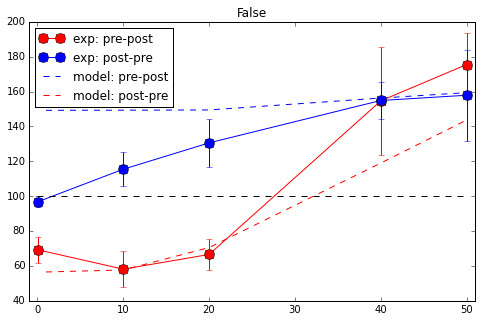

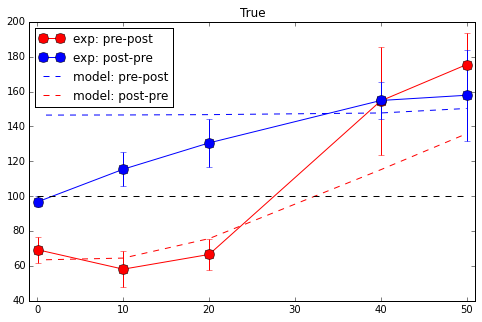

In [10]:
colors = ['b--', 'r--']
for h1 in h1_s:
    figure(figsize=(8,5))
    errorbar(sjos_freqs,sjos_ltds[:,0],sjos_ltds[:,1],c='r',marker='o',markersize=10)

    sjos_ltps = zeros((sjos_freqs.shape[0],2))
    for idx in range(sjos_ltps.shape[0]):
        sjos_ltps[idx,0] = ltps[idx*2]
        sjos_ltps[idx,1] = ltps[idx*2+1]-ltps[idx*2]
    errorbar(sjos_freqs,sjos_ltps[:,0],sjos_ltps[:,1],c='b',marker='o',markersize=10)
    xlim([-1,51])
    title(h1)
    for d_idx, delta in enumerate(delta_s):
        dws = zeros(len(freq_s))
        for idx, freq in enumerate(freq_s):
            p = (h1, freq, delta)
            curr = data_fit[p][0]
            dws[idx] = curr.res['weights'][-1] / curr.res['weights'][0]
        plot([float(a) for a in freq_s], 100*dws, colors[d_idx])
    plot([0,50],[100,100],'k--')
    legend(['exp: pre-post', 'exp: post-pre', 'model: pre-post', 'model: post-pre'], loc=0)

## varying parameters

In [11]:
import random
r = lambda: random.randint(0,255)
colors = ['#%02X%02X%02X' % (r(),r(),r()) for _ in range(5)]
print colors

['#525A28', '#A64E60', '#FE39DD', '#0F7D01', '#5EFBC5']


In [12]:
def show_plot(vary, h1, l_f):
    for delta in delta_s:
        for i in [i_s[0], i_s[-1]] + i_s[1:-1]:
            dws = zeros(len(freq_s))
            for idx, freq in enumerate(freq_s):
                p = (vary, h1, l_f, freq, delta, i)
                curr = data_vary[p][0]
                dws[idx] = curr.res['weights'][-1] / curr.res['weights'][0]
            plot([float(a) for a in freq_s], dws, c=colors[int(i)])
    plot([0,50],[1,1],'k--')


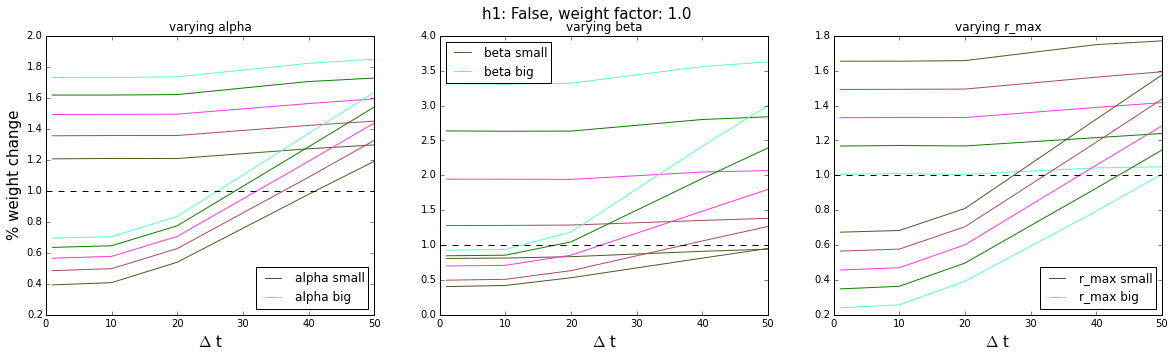

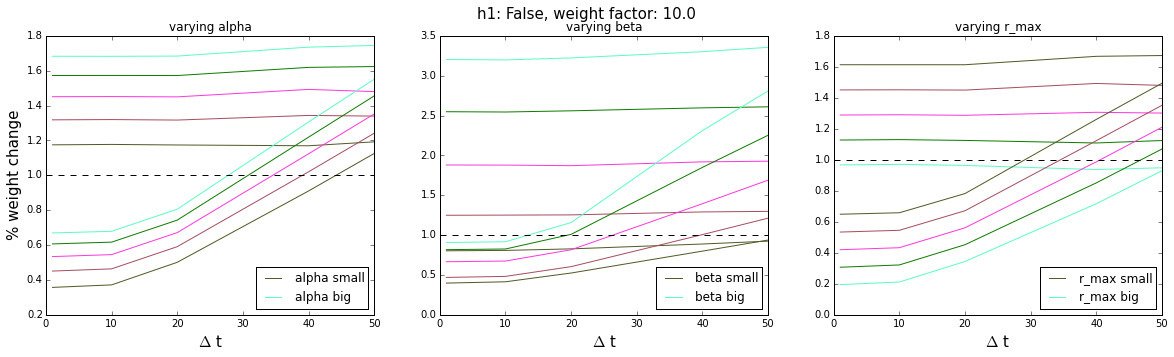

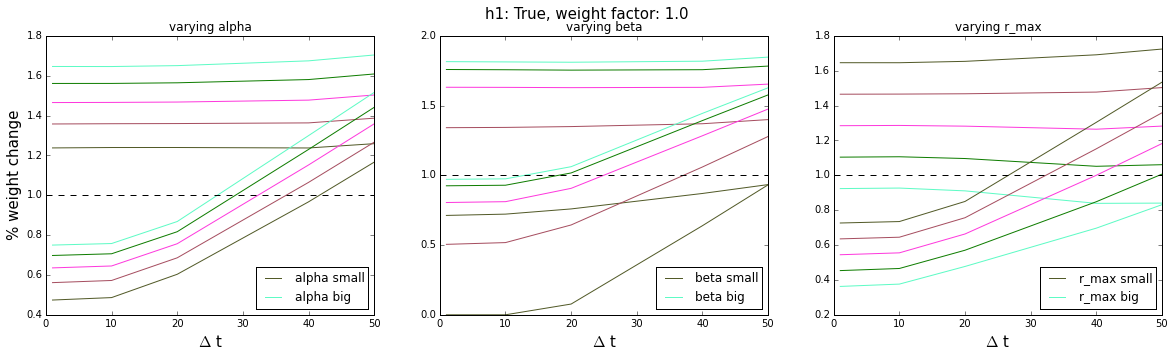

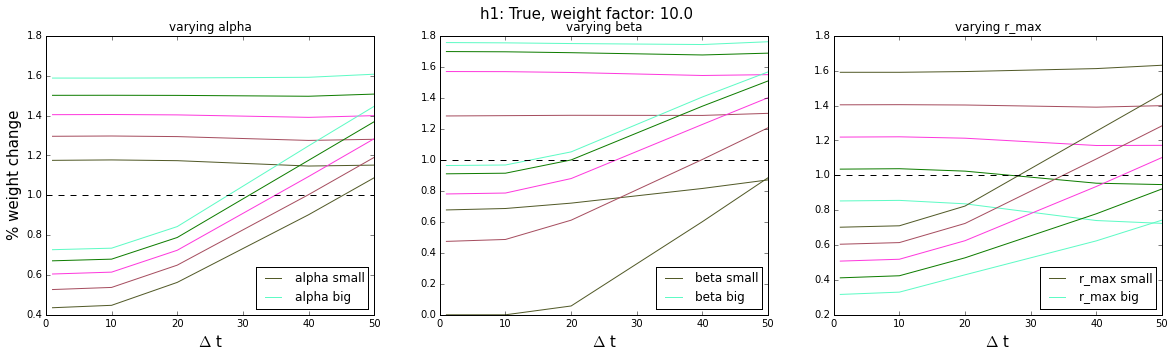

In [13]:
for h1 in h1_s:
    for l_f in l_f_s:
        figure(figsize=(20,5))
        for i, vary in enumerate(vary_s):
            subplot(1,3,i+1)
            show_plot(vary, h1, l_f)
            title('varying {0}'.format(vary))
            xlabel('$\Delta$ t', fontsize=15)
            if i==0:
                ylabel('% weight change', fontsize=15)
            legend(['{0} small'.format(vary), '{0} big'.format(vary)], loc=0)
        suptitle('h1: {0}, weight factor: {1}'.format(h1, l_f), fontsize=15)